### IMPORT LIBRARY:

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### READ DATA 

In [26]:
df = pd.read_csv("C:/Users/eng_a/Downloads/insurance.csv")

### EXPLORE DATA 

In [27]:
df.shape

(1338, 7)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
df.duplicated().sum()

1

In [31]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [32]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
635,64,male,38.190,0,no,northeast,14410.93210
1239,25,female,42.130,1,no,southeast,3238.43570
471,18,female,30.115,0,no,northeast,2203.47185


### DATA PREPROCESSING 

In [35]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [36]:
# one hot encoder for sex 
converted_sex = pd.get_dummies(df['sex'],drop_first=False,dtype='int')

In [37]:
converted_sex

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [38]:
df = pd.concat([df,converted_sex],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [39]:
df.drop(['sex'],axis=1,inplace=True)


In [40]:
df.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [41]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [44]:
coverted_smoker = pd.get_dummies(df['smoker'],drop_first=False,dtype='int')
coverted_smoker

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [46]:
df = pd.concat([df,coverted_smoker],axis=1)
df.head()

,age,bmi,children,smoker,region,charges,female,male,no,yes
0,19,27.900,0,yes,southwest,16884.92400,1,0,0,1
1,18,33.770,1,no,southeast,1725.55230,0,1,1,0
2,28,33.000,3,no,southeast,4449.46200,0,1,1,0
3,33,22.705,0,no,northwest,21984.47061,0,1,1,0
4,32,28.880,0,no,northwest,3866.85520,0,1,1,0


In [47]:
df.drop(['smoker'],inplace=True,axis=1)
df.head()

,age,bmi,children,region,charges,female,male,no,yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


### **Ordinal Number Encoding**

In [49]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [50]:
region_values={"southwest":1,
             "southeast":2,
              "northwest":3,
              "northeast":4}

In [51]:
region_values

{'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}

In [53]:
df["region_encodeing"]=df.region.map (region_values)

In [54]:
df.head()

,age,bmi,children,region,charges,female,male,no,yes,region_encodeing
0,19,27.900,0,southwest,16884.92400,1,0,0,1,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0,2
2,28,33.000,3,southeast,4449.46200,0,1,1,0,2
3,33,22.705,0,northwest,21984.47061,0,1,1,0,3
4,32,28.880,0,northwest,3866.85520,0,1,1,0,3


In [55]:
df.drop(['region'],inplace=True,axis=1)

In [56]:
df.head()

,age,bmi,children,charges,female,male,no,yes,region_encodeing
0,19,27.900,0,16884.92400,1,0,0,1,1
1,18,33.770,1,1725.55230,0,1,1,0,2
2,28,33.000,3,4449.46200,0,1,1,0,2
3,33,22.705,0,21984.47061,0,1,1,0,3
4,32,28.880,0,3866.85520,0,1,1,0,3


In [57]:
df.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
female                int32
male                  int32
no                    int32
yes                   int32
region_encodeing      int64
dtype: object

### DATA VISULIZATION 

C:\Users\eng_a\AppData\Local\Temp\ipykernel_15640\2044278542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

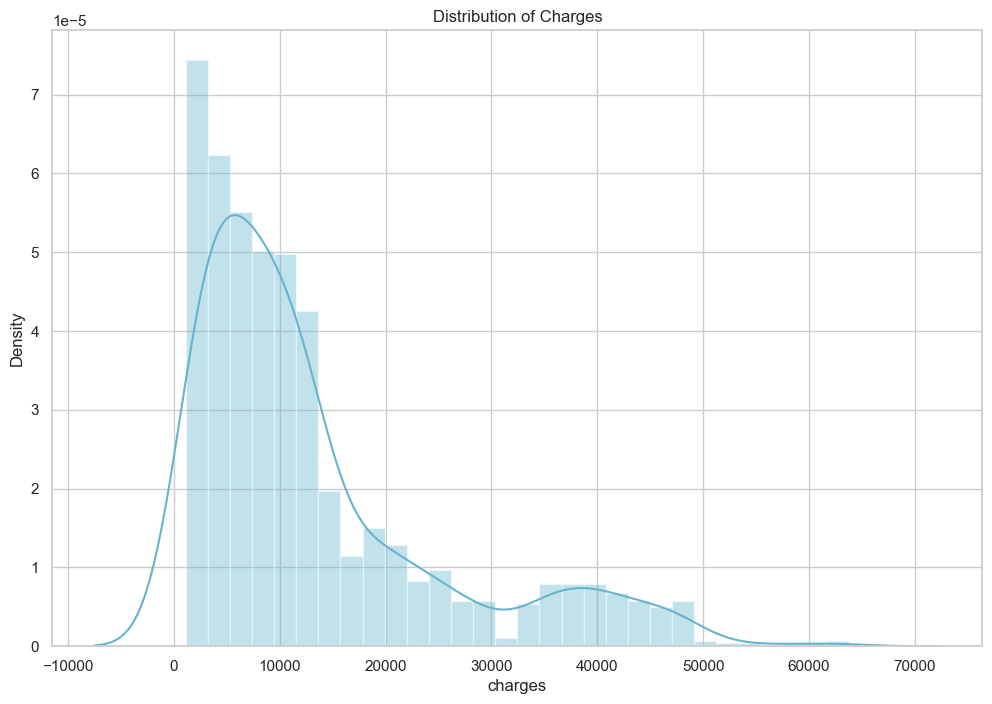

In [58]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

C:\Users\eng_a\AppData\Local\Temp\ipykernel_15640\3050198714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


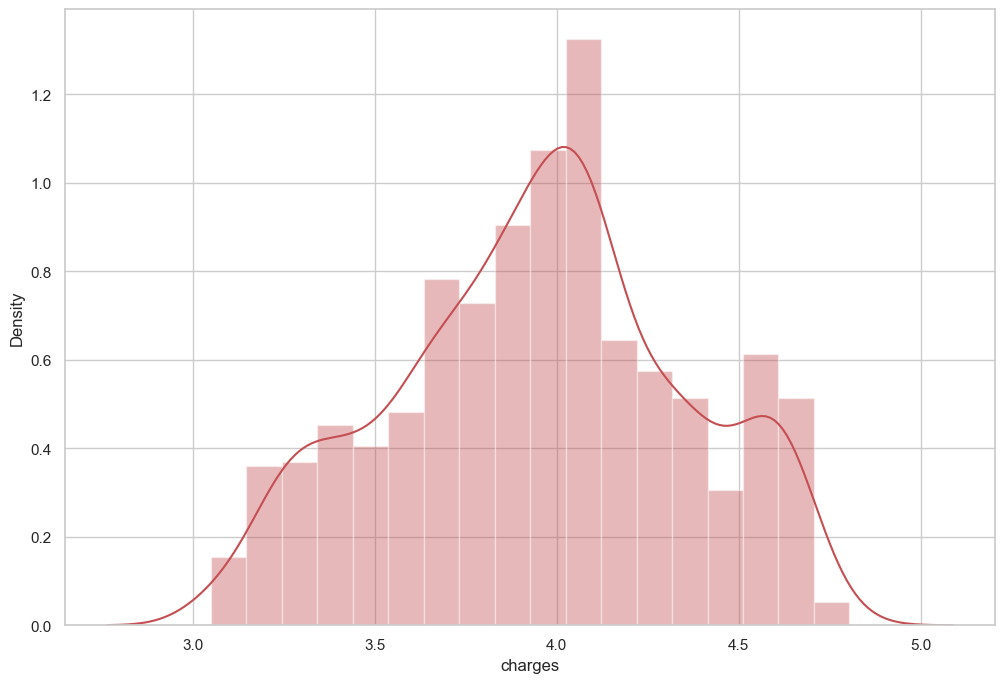

In [59]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

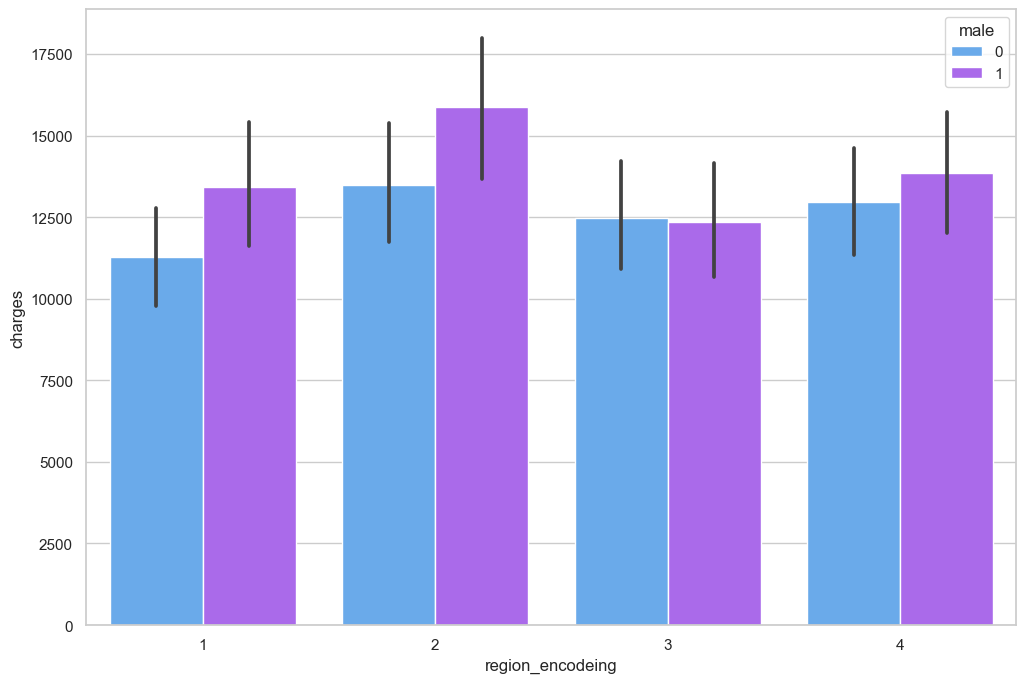

In [63]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region_encodeing', y='charges', hue='male', data=df, palette='cool')

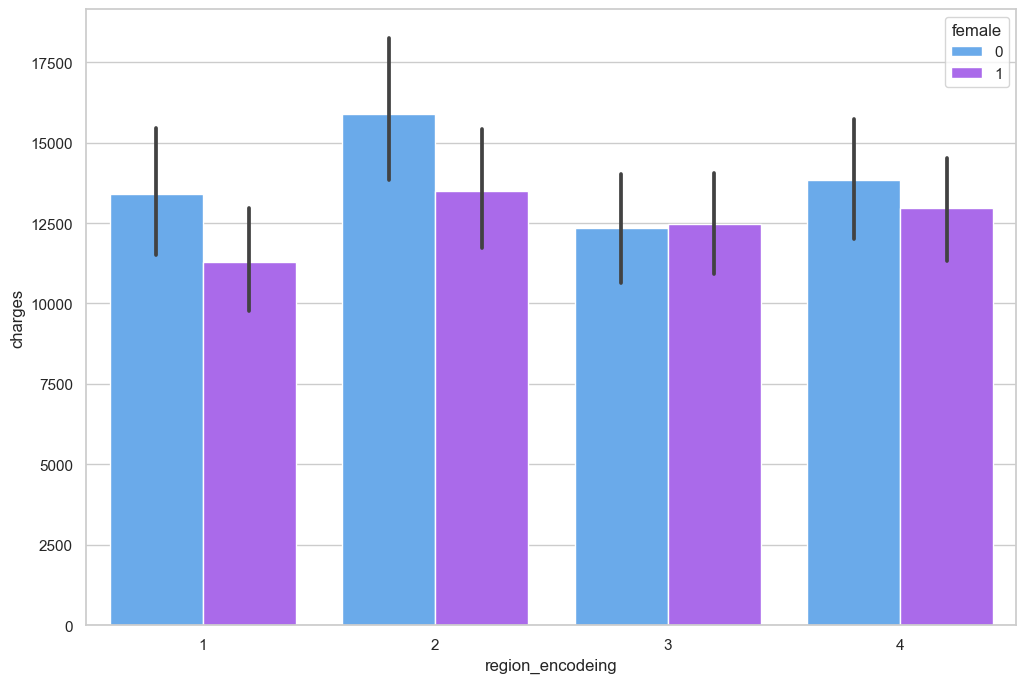

In [64]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region_encodeing', y='charges', hue='female', data=df, palette='cool')

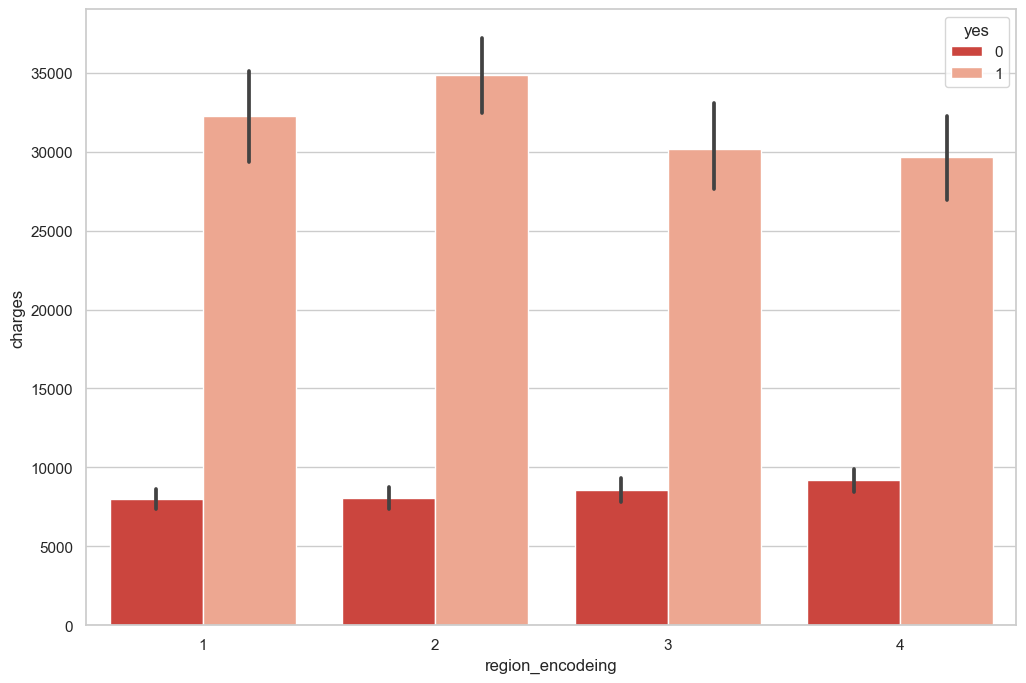

In [65]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region_encodeing', y = 'charges',
                 hue='yes', data=df, palette='Reds_r')

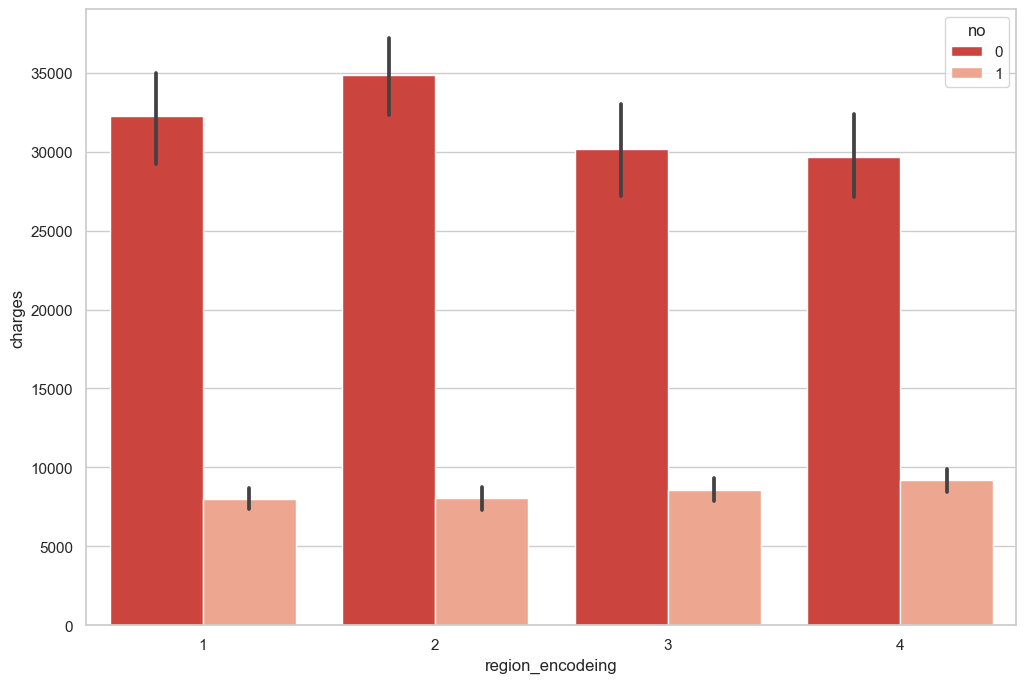

In [66]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region_encodeing', y = 'charges',
                 hue='no', data=df, palette='Reds_r')

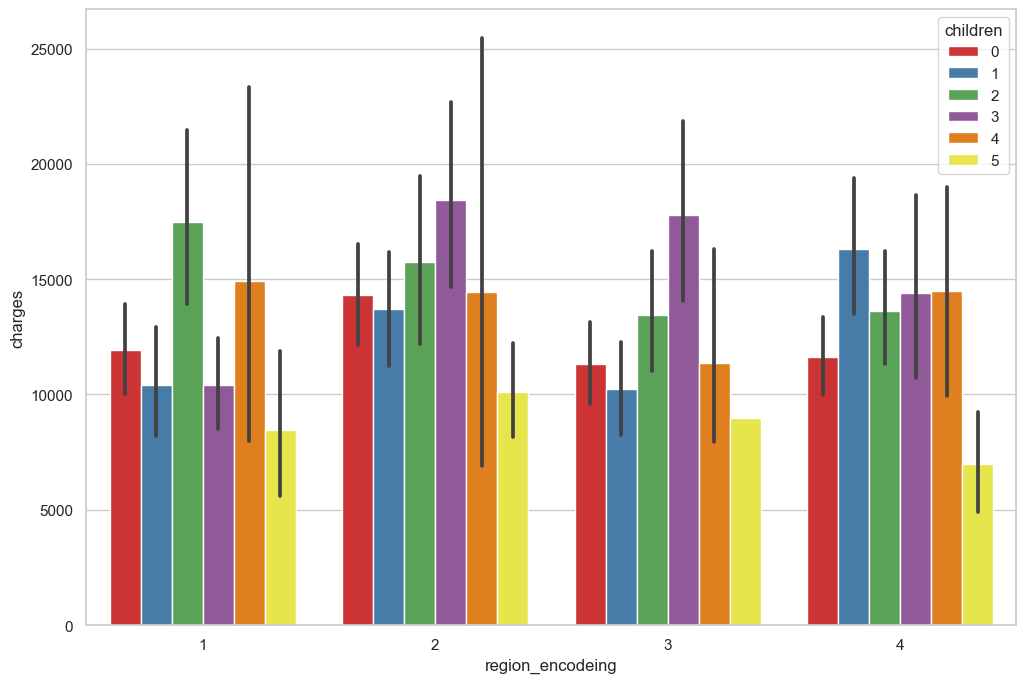

In [67]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region_encodeing', y='charges', hue='children', data=df, palette='Set1')

C:\Users\eng_a\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\eng_a\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\eng_a\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


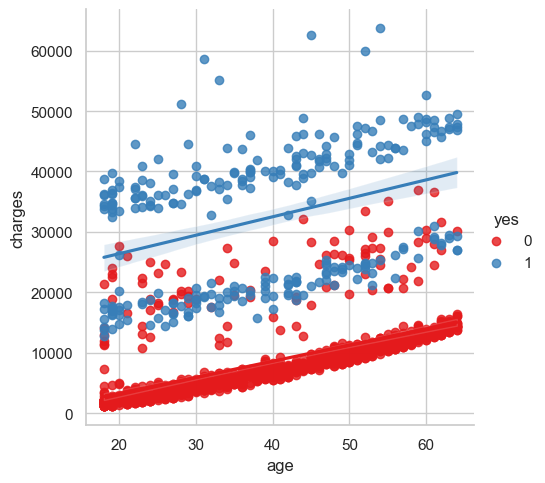

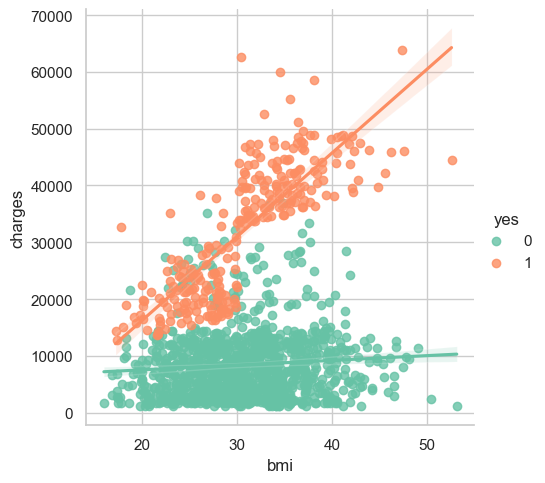

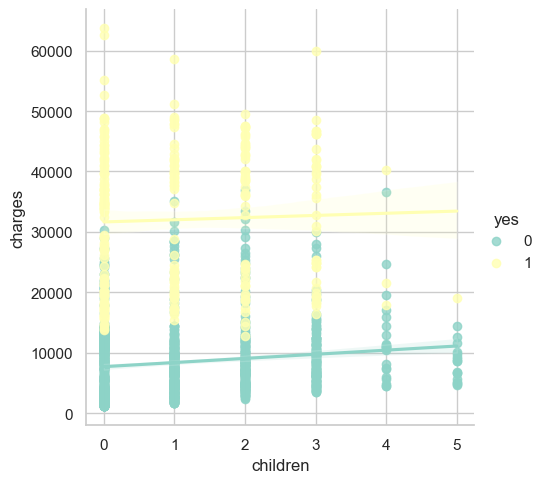

In [68]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='yes', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='yes', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='yes', palette='Set3')

C:\Users\eng_a\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\eng_a\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\eng_a\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


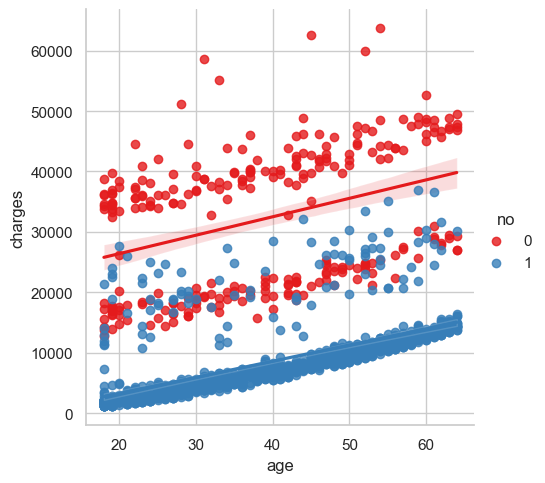

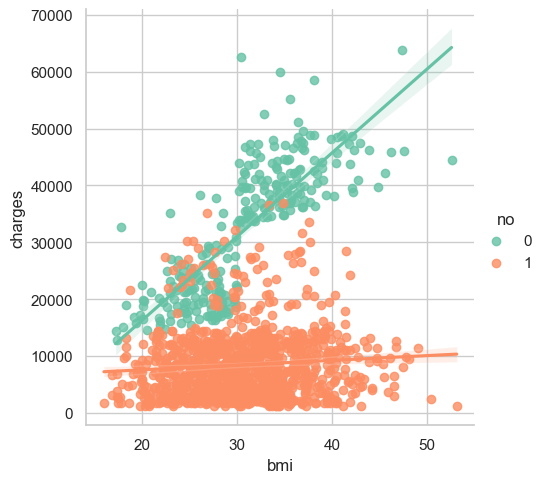

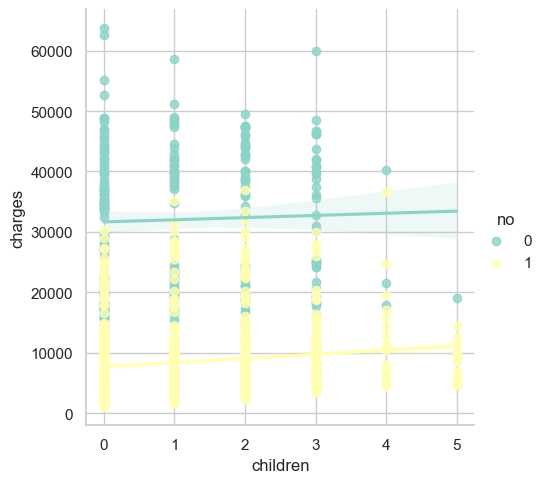

In [69]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='no', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='no', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='no', palette='Set3')

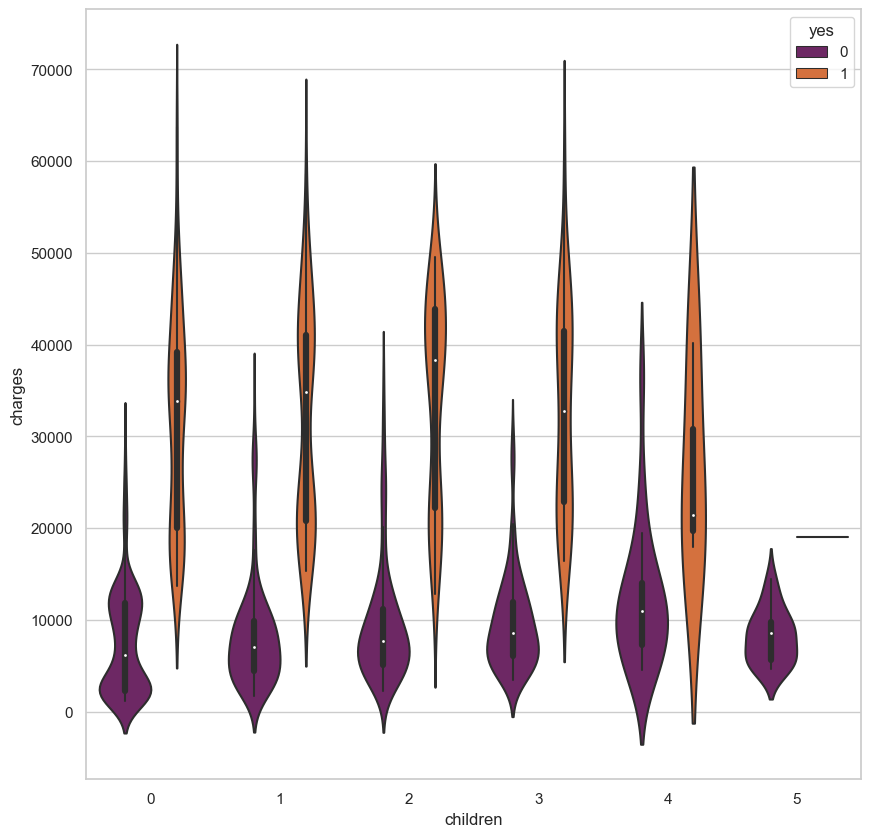

In [70]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='yes', palette='inferno')

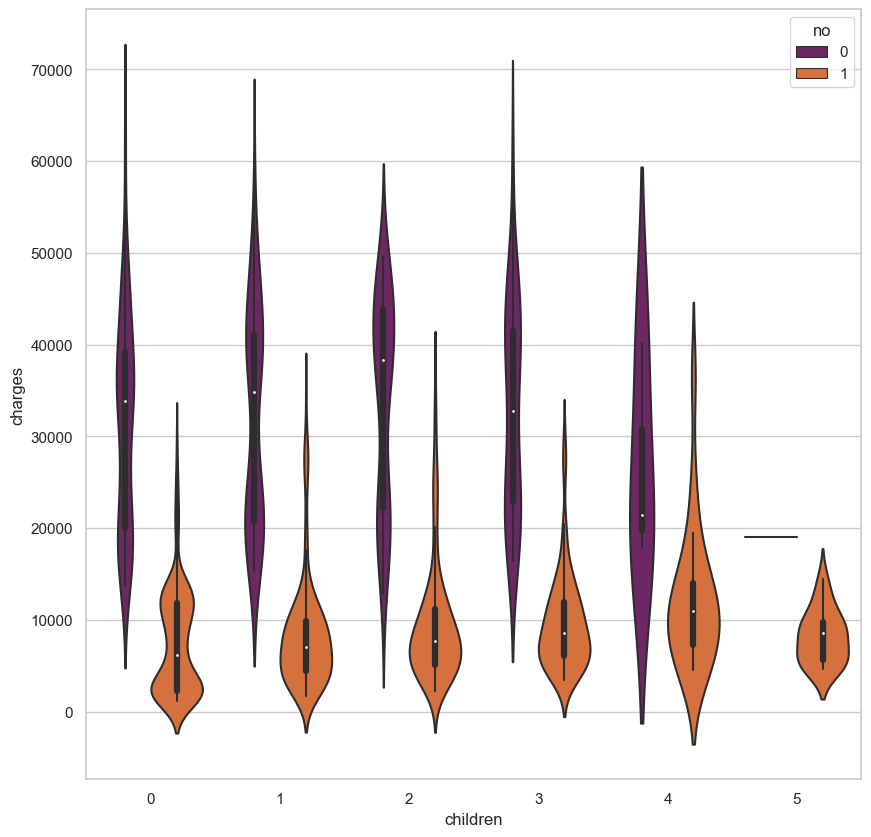

In [71]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='no', palette='inferno')

### DATA PREPROCESSING 

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as holdout


In [73]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [76]:
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

### LINEAR REGRESSION MODEL

In [77]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)


LinearRegression()

In [78]:
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-1043.7407325842014
[   253.99185244    328.40261701    443.72929547     12.16227549
    -12.16227549 -11784.43974191  11784.43974191    288.50857254]
0.799874714544996


### Ridge Regression model 

In [79]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)


Ridge(alpha=0.5)

In [80]:
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-1051.4687167011962
[ 2.53943078e+02  3.28367618e+02  4.43910751e+02  1.14544640e+01
 -1.14544640e+01 -1.17674418e+04  1.17674418e+04  2.88706682e+02]
0.79978736703695


### Lasso Regression

Lasso regression is an adaptation of the popular and widely used linear regression algorithm. 
It enhances regular linear regression by slightly changing its cost function, 
which results in less overfit models. Lasso regression is very similar to ridge regression, 
but there are some key differences between the two that you will have to understand
if you want to use them effectively. In this article, 
you will learn everything you need to know about lasso regression,
the differences between lasso and ridge, as well as how you can start using lasso regression 
in your own machine learning projects.

In [84]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)


Lasso(alpha=0.2)

In [85]:
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

10728.947614539102
[ 2.53991729e+02  3.28389366e+02  4.43587023e+02  2.34596925e+01
 -5.44118496e-14 -2.35676147e+04  1.96335178e-12  2.88340118e+02]
0.7998690403329299


### Random Forest Regressor



In [87]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100  ,n_jobs = -1)
Rfr.fit(x_train,y_train)



RandomForestRegressor(n_jobs=-1)

In [95]:
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (mean_squared_error(x_train_pred, y_train),
       mean_squared_error(x_test_pred, y_test)))

      

MSE train data: 3693796.344, MSE test data: 19838188.886


### THANKS FOR VISITING 
### ENG: AHMED RAFT MAHMOUD 